In [19]:
import tensorflow as tf
import pandas as pd
import re
import os
import string
import numpy as np

## Pre-processing

pd.read_csv(fileName): Read a comma-separated values (csv) file into DataFrame.<br>
DataFrame.head(n=5): Return the first n rows. <br>
DataFrame.to_string(): Render a DataFrame to a console-friendly tabular output. return str<br> 
import re: import regex lib <br>
re.sub(): Replaces one or many matches with a string<br>
re.compile(): is used to compile a regular expression pattern provided as a string into a regex pattern object (re.Pattern) <br>


In [20]:
#Doc du lieu tu file csv
df = pd.read_csv('comments.csv')

In [21]:
type(df)
df.to_string() #Show entire DataFrame

'     label                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          text\n0        1                                                                                                                                                                                                                                                                                                                                                                                                                                              Hàng giao nhanh, bàn phím nặng, gói hàng cẩn thận và 

In [22]:
df.head(10)

,label,text
0,1,"Hàng giao nhanh, bàn phím nặng, gói hàng cẩn t..."
1,1,Led đẹp bấm phím rất thích với giá tiền này th...
2,0,"Ủng hộ member hội macbook Việt, nghĩ là mua tr..."
3,0,Giá đỡ gập khá khó khăn. Không đẹp như hình. N...
4,1,"Khá là ưng sản phẩm, đúng với mô tả và đi ok d..."
5,0,Thời gian chuẩn bị hàng của shop lâu + thời gi...
6,1,Sản phẩm đẹp hợp với giá tiền
7,1,Sản phẩm chất lượng quá ổn luôn ấy có miếng bả...
8,1,"sản phẩm tốt, màu như hình , nên mua nha mn , ..."
9,0,Liên hệ shop báo vấn đề thì được trả lời 1 tin...


In [23]:
#Xoa cac phan tu empty trong DataFrame
new_df = df.dropna()
#Xoa lap trong DataFrame
new_df = df.drop_duplicates()

In [24]:
#Cac ham tien xu ly van ban su dung regex

#Xoa link 
def remove_hyperlink(text):
    return re.sub(r"http\S+","",text)

#Chuyen ve chu cai viet thuong
def to_lower(text):
    return text.lower()

#Loai bo cac chu so 
def remove_number(text):
    return re.sub(r'\d+',"", text)

#Loai bo dau cham cau:
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    return text 

#Loai bo khoang trang hai ben van ban
def remove_whitespace(text):
    text = re.sub(r'\s+',' ', text)
    text.strip()
    return text 

#Loai bo dau xuong dong
def replace_newline(text):
    return text.replace('\n',' ')

#Loai bo emoji 
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', text)

#loai bo cac ky tu khong co y nghia
def remove_unmeaning_word(text):
    text = re.sub(r'=[)]+', '', text) #Loai bo ky tu =)))
    text = re.sub(r':[D]+','', text) #loai bo ky tu :D :DDDDD
    return text

#Thay the cac tu viet tat trong tieng Viet
def replace_acronym(text):
    text = re.sub(r'\s+k\s+|\s+K\s+|^k\s+|^K\s+|\s+k$|\s+K$|\s+ko\s+|\s+Ko\s+|^ko\s+|^Ko\s+|\s+ko$|\s+Ko$'
                  ,' không ', text)
    text = re.sub(r'\s+đc\s+|\s+Đc\s+|^đc\s+|^Đc\s+|\s+đc$|\s+Đc$', ' được ', text)
    text = re.sub(r'\s+nhg\s+|\s+Nhg\s+|^nhg\s+|^Nhg\s+|\s+nhg$|\s+Nhg$', ' nhưng ', text)
    text = re.sub(r'\s+mk\s+|\s+Mk\s+|^mk\s+|^Mk\s+|\s+mk$|\s+Mk$', ' mình ', text)
    return text

In [25]:
s = "Chân váy đẹp lắm mọi người ơi nên mua nha😍😘"

In [26]:
remove_emoji(s)

'Chân váy đẹp lắm mọi người ơi nên mua nha '

In [27]:
s = "asdasdasdasd=)))))))))))))))) adlsdlasldas :D:D:DDDDDDDaefDDDD sasdasd Da nay khong tot=) :D"

In [28]:
remove_unmeaning_word(s)

'asdasdasdasd adlsdlasldas aefDDDD sasdasd Da nay khong tot '

In [29]:
text = r'Nhg a k    đc      yeu em K'
text = replace_acronym(text)
print(text)

 nhưng a không được yeu em không 


In [30]:
#Tong hop cac ham lai de lam sach du lieu
def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      to_lower,
                      remove_number,
                      remove_punctuation,
                    remove_emoji,
                      replace_acronym,
                    remove_whitespace,
                    replace_newline]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

## Chia ra dữ liệu train-test 

sklearn.model_selection.train_test_split(): Split arrays or matrices into random train and test subsets. <br>
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None) <br>

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#Chia ra train va test voi ti le 0.2
comments_train, comments_test, label_train, label_test = train_test_split(df['text'], df['label'], test_size=0.2)

In [33]:
#Preprocessing data 
x_train = [clean_up_pipeline(o) for o in comments_train]
x_test = [clean_up_pipeline(o) for o in comments_test]

## Tokenizing và tạo target label

Label encoding <br>
fit_transform(): Fit label encoder and return encoded labels. <br>
tf.keras.preprocessing.text.Tokenizer: Text tokenization utility class <br>
fit_on_texts(texts): Updates internal vocabulary based on a list of texts.<br>
In the case where texts contains lists, we assume each entry of the lists to be a token.<br>
Required before using texts_to_sequences or texts_to_matrix. <br>
texts_to_sequences(texts): Transforms each text in texts to a sequence of integers <br>
tf.keras.utils.pad_sequences(): Pads sequences to the same length

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
y_train = le.fit_transform(label_train.values) #numpy array
y_test = le.transform(label_test.values)

In [36]:
np.array_equal(y_train, label_train)

True

Tokenizing

In [37]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np

In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

print(tokenizer.word_index)

x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))

x_train_features = pad_sequences(x_train_features, maxlen=50)
x_test_features = pad_sequences(x_test_features, maxlen=50)


{'không': 1, 'hàng': 2, 'shop': 3, 'mua': 4, 'rất': 5, 'thì': 6, 'giao': 7, 'có': 8, 'được': 9, 'nên': 10, 'mình': 11, 'nhưng': 12, 'sản': 13, 'mà': 14, 'là': 15, 'phẩm': 16, 'chất': 17, 'nhanh': 18, 'và': 19, 'lượng': 20, 'giá': 21, 'đã': 22, 'đẹp': 23, 'máy': 24, 'gói': 25, 'màu': 26, 'bị': 27, 'như': 28, 'nhận': 29, 'tiền': 30, 'hình': 31, 'cho': 32, 'với': 33, 'quá': 34, 'tốt': 35, 'lại': 36, 'đóng': 37, 'cũng': 38, 'ok': 39, 'còn': 40, 'chắc': 41, 'dùng': 42, 'lần': 43, 'của': 44, 'mới': 45, 'để': 46, 'khá': 47, 'cái': 48, 'người': 49, 'đặt': 50, 'luôn': 51, 'hơi': 52, 'lắm': 53, 'nha': 54, 'chắn': 55, 'ạ': 56, 'đúng': 57, 'này': 58, 'về': 59, 'cẩn': 60, 'thận': 61, 'quần': 62, 'sau': 63, 'sẽ': 64, 'loa': 65, 'hơn': 66, 'phải': 67, 'màn': 68, 'chỉ': 69, 'sao': 70, 'đáng': 71, 'chưa': 72, 'nghe': 73, 'nhiều': 74, 'mọi': 75, 'làm': 76, 'ra': 77, 'lâu': 78, 'gì': 79, 'thấy': 80, 'ổn': 81, 'nào': 82, 'in': 83, 'mặc': 84, 'rồi': 85, 'tình': 86, 'nhé': 87, 'ảnh': 88, 'vấn': 89, 'nhiệt':

C:\Users\Hoang PC\AppData\Local\Temp\ipykernel_16560\4101614011.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
C:\Users\Hoang PC\AppData\Local\Temp\ipykernel_16560\4101614011.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test_features = np.array(tokenizer.texts_to_sequences(x_test))


In [39]:
print(x_train_features)
print(x_train_features.shape)

[[   0    0    0 ...  319  287  383]
 [   0    0    0 ...  133  176    3]
 [   0    0    0 ...   17   20  107]
 ...
 [   1 1544  241 ...    5  197   54]
 [   0    0    0 ...  668    4  846]
 [   0    0    0 ...  281  101   39]]
(494, 50)


## Build model

tf.keras.Sequential():  groups a linear stack of layers into a tf.keras.Model <br>

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
def LMTS(input_length, input_dim, x_train, x_test, y_train, y_test):
    lstm_model = Sequential()
    #Creating an embedding layer to vectorize
    lstm_model.add(Embedding(input_dim=input_dim+1, output_dim=20, input_length=input_length))
    #Addding LSTM
    lstm_model.add(LSTM(64))
    # Relu allows converging quickly and allows backpropagation
    lstm_model.add(Dense(16, activation='relu'))
    #Deep Learninng models can be overfit easily, to avoid this, we add randomization using drop out
    lstm_model.add(Dropout(0.1))
    # Adding sigmoid activation function to normalize the output
    lstm_model.add(Dense(1, activation='sigmoid'))

    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    lstm_model.summary()
    history = lstm_model.fit(x_train, y_train, epochs=20, batch_size=32, shuffle = True,
                        validation_data=(x_test, y_test))
    #Save the model
    lstm_model.save('lstm_model.h5')
    y_predict = [1 if o>0.5 else 0 for o in lstm_model.predict(x_test)]
    return history, y_predict


In [42]:
def evaluating(test_y, y_predict):
    cf_matrix =confusion_matrix(test_y,y_predict)
    print("Precision: {:.2f}%".format(100 * precision_score(test_y, y_predict)))
    print("Recall: {:.2f}%".format(100 * recall_score(test_y, y_predict)))
    print("F1 Score: {:.2f}%".format(100 * f1_score(test_y,y_predict)))
    ax= plt.subplot()
    #annot=True to annotate cells
    sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='')
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Tiêu cực', 'Tích cực']); ax.yaxis.set_ticklabels(['Tiêu cực', 'Tích cực'])
    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 20)            31160     
                                                                 
 lstm (LSTM)                 (None, 64)                21760     
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 53,977
Trainable params: 53,977
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 

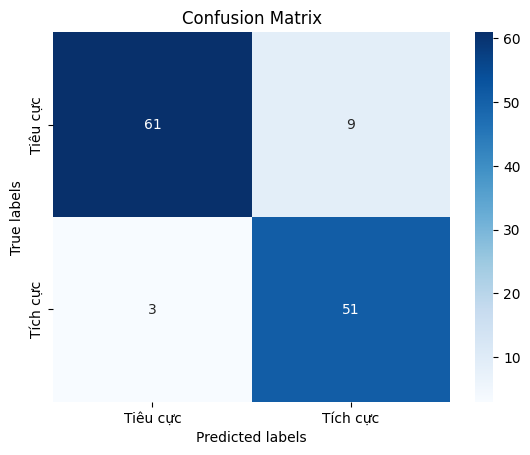

In [43]:
lmts, y_predict = LMTS(50,1557, x_train_features, x_test_features, y_train, y_test)
evaluating(y_test, y_predict)

## Load model


In [44]:
def get_predict(cmts, tk):
    my_model = tf.keras.models.load_model('lstm_model.h5')
    cmts = np.array(cmts)
    cmts = tokenizer.texts_to_sequences(cmts)
    cmts = pad_sequences(cmts, maxlen=50)
    #result = [1 if o>0.5 else 0 for o in my_model.predict(cmts)]
    result = my_model.predict(cmts)
    return result

In [45]:
cmts = ['Mình mua mấy món lận shop vẫn giao đủ hàng lại đẹp nữa thảm có hơi nhỏ so với tưởng tượng của mình nhưng mà đẹp nên mua nha',
       'Hàng rất đẹp luôn shop ơi lên hình xinh quá xinh luôn coa dịp sẽ ủng hộ thêm',
       'Hảo shipper:)) Hôm trước bận k ra lấy hàng được bảo hôm sau giao lại mà mất tích luôn:))',
       'Hàng bị hư hỏng Yêu cầu giải quyết chậm và kh rứt khoát Còn âm thanh thì ổn màu đẹp ',
        'Sẽ ủng hộ dài dài nhé shop ơi',
        'Nhìn chung ổn, mua cho con gái đeo chơi, chỉ thích lắm luôn, giờ thì phải nhấn nút mới sáng lên, mà cũng ko chính xác 😬, mà chỗ máu chốt sao nhanh tuột quá đi',
       'Sản phẩm bị gãy r shop ơi vừa nhận vào khui hàng thì thấy gãy',
        'Sản phẩm tốt thế này mà tới bây giờ tôi mới phát hiện được nó thì thật là uổng quá đi mà Thật không thể tin được chất lượng của sản phẩm này quá tốt mà lại còn được giảm giá nữa chứ Mua được với giá ưu đãi thích lắm, còn mua đúng sản phẩm mình thích bấy lâu nay nữa Shop làm ăn rất chất lượng từ sản phẩm đến dịch vụ, hứa ủng hộ shop lâu dài',
       'Nhận dc hàng thì tai nghe nát hết , hỏng vỡ']
result = get_predict(cmts, tokenizer)
print(result)

1/1 [==============================] - 0s 484ms/step
[[9.7584814e-01]
 [9.9885213e-01]
 [6.8697199e-04]
 [1.0304741e-02]
 [9.8817635e-01]
 [1.1827259e-03]
 [5.9488684e-01]
 [9.9891782e-01]
 [2.9890445e-01]]
